In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data=pd.read_csv("C:/Users/hamza/Downloads/New Folder 1/sales_data_sample.csv",encoding="unicode_escape",usecols=['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH',
       'SALES', 'ORDERDATE', 'STATUS',
       'PRODUCTLINE', 'MSRP', 'CUSTOMERNAME',
       'ADDRESSLINE1','CITY', 'STATE',
       'COUNTRY',
       'DEALSIZE'])
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small
1,10121,34,81.35,2765.90,05/07/2003 0:00,Shipped,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small
2,10134,41,94.74,3884.34,07/01/2003 0:00,Shipped,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium


Data cleaning

In [43]:
data.shape

(2823, 14)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   PRODUCTLINE      2823 non-null   object 
 7   MSRP             2823 non-null   int64  
 8   CUSTOMERNAME     2823 non-null   object 
 9   ADDRESSLINE1     2823 non-null   object 
 10  CITY             2823 non-null   object 
 11  STATE            1337 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 308.9+ KB


In [45]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE',
       'STATUS', 'PRODUCTLINE', 'MSRP', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY',
       'STATE', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [46]:
pd.set_option("display.max_columns",None)

In [47]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small
1,10121,34,81.35,2765.90,05/07/2003 0:00,Shipped,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small
2,10134,41,94.74,3884.34,07/01/2003 0:00,Shipped,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium


In [48]:
data.isna().sum()

ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
SALES                 0
ORDERDATE             0
STATUS                0
PRODUCTLINE           0
MSRP                  0
CUSTOMERNAME          0
ADDRESSLINE1          0
CITY                  0
STATE              1486
COUNTRY               0
DEALSIZE              0
dtype: int64

In [49]:
data["STATE"].fillna("No State",inplace=True)

In [50]:
data["STATE"].str.contains("No State")

0       False
1        True
2        True
3       False
4       False
        ...  
2818     True
2819     True
2820     True
2821     True
2822    False
Name: STATE, Length: 2823, dtype: bool

In [51]:
data.drop_duplicates(inplace=True)

In [52]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small
1,10121,34,81.35,2765.90,05/07/2003 0:00,Shipped,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,Reims,No State,France,Small
2,10134,41,94.74,3884.34,07/01/2003 0:00,Shipped,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,No State,France,Medium
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium


In [53]:
#Data is clean

data.isna().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
SALES              0
ORDERDATE          0
STATUS             0
PRODUCTLINE        0
MSRP               0
CUSTOMERNAME       0
ADDRESSLINE1       0
CITY               0
STATE              0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [54]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small
1,10121,34,81.35,2765.90,05/07/2003 0:00,Shipped,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,Reims,No State,France,Small
2,10134,41,94.74,3884.34,07/01/2003 0:00,Shipped,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,No State,France,Medium
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium


In [55]:
#Changing date column to datetime format

data.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
SALES              float64
ORDERDATE           object
STATUS              object
PRODUCTLINE         object
MSRP                 int64
CUSTOMERNAME        object
ADDRESSLINE1        object
CITY                object
STATE               object
COUNTRY             object
DEALSIZE            object
dtype: object

In [56]:
data["ORDERDATE"]=pd.to_datetime(data["ORDERDATE"])

In [57]:
#Sucessfully convert str to datetime format

data.dtypes

ORDERNUMBER                 int64
QUANTITYORDERED             int64
PRICEEACH                 float64
SALES                     float64
ORDERDATE          datetime64[ns]
STATUS                     object
PRODUCTLINE                object
MSRP                        int64
CUSTOMERNAME               object
ADDRESSLINE1               object
CITY                       object
STATE                      object
COUNTRY                    object
DEALSIZE                   object
dtype: object

EDA Process

In [58]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2003-02-24,Shipped,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small
1,10121,34,81.35,2765.90,2003-05-07,Shipped,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,Reims,No State,France,Small
2,10134,41,94.74,3884.34,2003-07-01,Shipped,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,No State,France,Medium
3,10145,45,83.26,3746.70,2003-08-25,Shipped,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium
4,10159,49,100.00,5205.27,2003-10-10,Shipped,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium


In [59]:
data["Pro/loss"]=data["MSRP"] - data["PRICEEACH"]


In [60]:
data.loc[data['Pro/loss'] > 0, 'Result'] = 'Profit'
data.loc[data["Pro/loss"] <= 0, 'Result'] = 'Loss'

In [61]:
data2=data.copy()

In [62]:
data["COUNTRY"].value_counts()

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

Visualization

In [63]:
data2.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,Pro/loss,Result
0,10107,30,95.70,2871.00,2003-02-24,Shipped,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small,-0.70,Loss
1,10121,34,81.35,2765.90,2003-05-07,Shipped,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,Reims,No State,France,Small,13.65,Profit
2,10134,41,94.74,3884.34,2003-07-01,Shipped,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,No State,France,Medium,0.26,Profit
3,10145,45,83.26,3746.70,2003-08-25,Shipped,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium,11.74,Profit
4,10159,49,100.00,5205.27,2003-10-10,Shipped,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium,-5.00,Loss


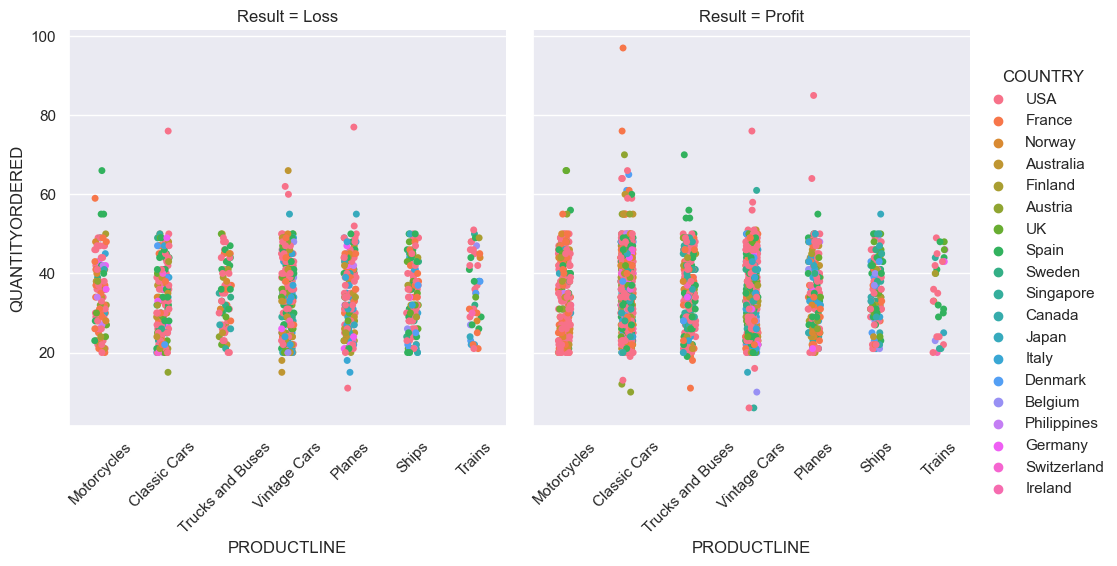

In [72]:

g=sns.catplot(data=data2,x="PRODUCTLINE",y="QUANTITYORDERED",hue="COUNTRY",col="Result")
sns.set(rc={"figure.figsize":(8,15)})
g.set_xticklabels(rotation=45)
plt.show()

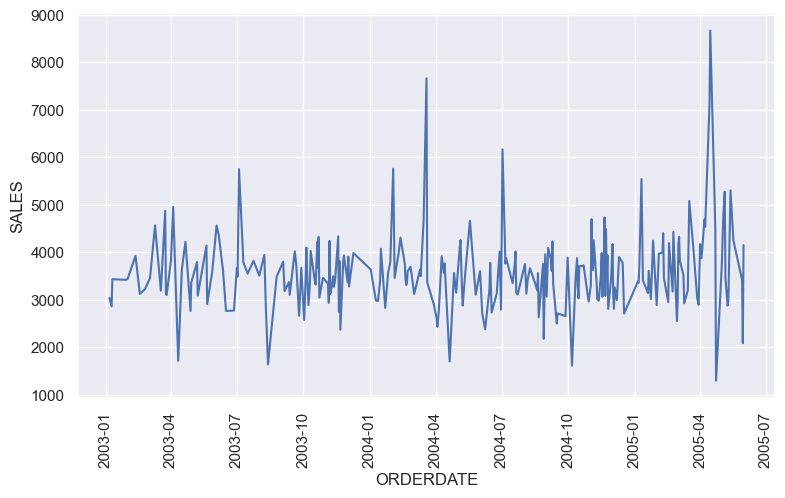

In [74]:
sns.lineplot(data=data2,x="ORDERDATE",y="SALES",errorbar=None)
sns.set(rc={"figure.figsize":(6,5)})
plt.tick_params(axis="x",rotation=90)
plt.show()

c:\Users\hamza\anaconda3\envs\minimal_ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\hamza\anaconda3\envs\minimal_ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\hamza\anaconda3\envs\minimal_ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\hamza\anaconda3\envs\minimal_ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\hamza\anaconda3\envs\minimal_ds\lib\site-packag

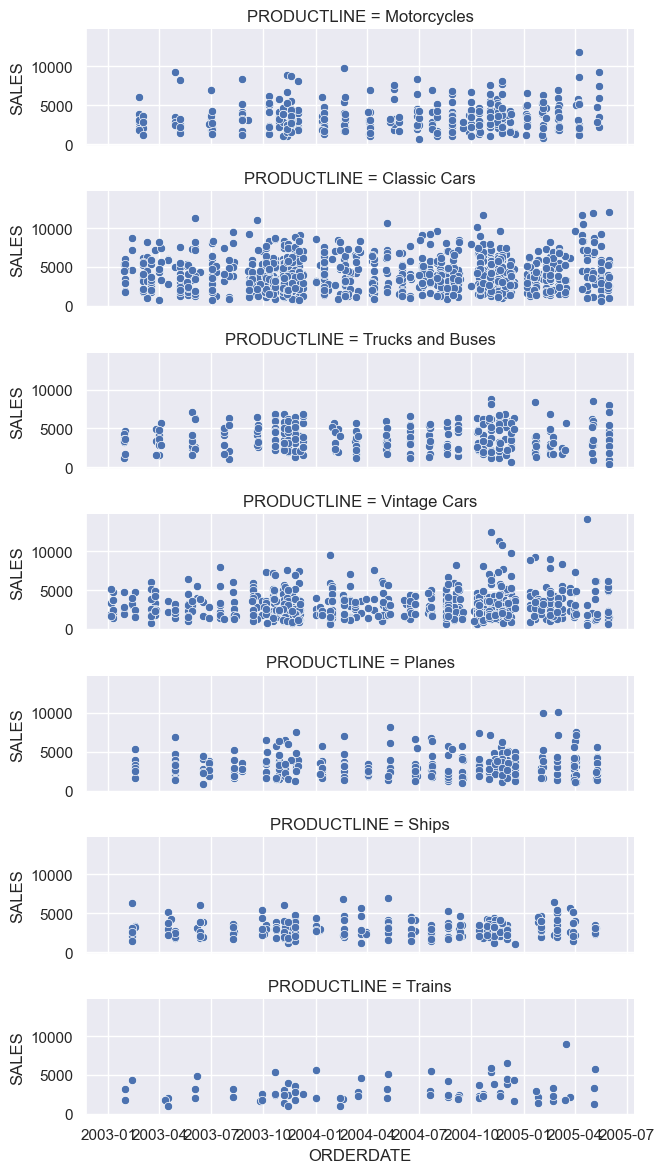

In [76]:

g2 = sns.FacetGrid(data=data2, row="PRODUCTLINE",
                  height=1.7, aspect=4,)
sns.set(rc={"figure.figsize":(6,16)})
g2.map(sns.scatterplot, "ORDERDATE","SALES")
